Ken Furudate

In [ ]:
import scanpy as sc
import anndata as ad

import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = ['Arial'] + plt.rcParams['font.sans-serif']
plt.rcParams["font.size"] = 20


import os
from copy import copy
import seaborn as sns
from pathlib import Path

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')
print(f"scanpy=={sc.__version__}")

scanpy==1.8.2


In [ ]:
sc.set_figure_params(facecolor="white", figsize=(8, 8), dpi_save=300)
sc.settings.verbosity = 3

In [ ]:
datadir="/data/singlec-ell/"

In [ ]:
in_f1 = "oscc_all.exp.txt"
in_f2 = "oscc_scRNA-seq_meta_data.txt"

In [ ]:
df = pd.read_table(os.path.join(datadir, in_f1), index_col="Unnamed: 0")
df

C9orf152   RPS11     ELMO2  CREB3L1    PNMA1  \
HNSCC22_P5_F06_S258_comb           0.0  5.4405  0.000000      0.0  0.00000   
HNSCC22_P5_C09_S225_comb           0.0  4.0254  0.096262      0.0  0.00000   
HNSCC22_P5_C04_S220_comb           0.0  6.4179  0.000000      0.0  0.00000   
HNSCC22_P5_A04_S196_comb           0.0  6.5131  0.806530      0.0  0.00000   
HNSCC22_P5_A12_S204_comb           0.0  6.7750  0.000000      0.0  0.00000   
...                                ...     ...       ...      ...      ...   
HNSCC6_p15_HNSCC6_P15_LN_C05       0.0  6.3301  0.000000      0.0  0.00000   
HNSCC6_p15_HNSCC6_P15_LN_A02       0.0  7.6815  0.000000      0.0  0.00000   
HNSCC6_p15_HNSCC6_P15_LN_B02       0.0  7.4076  1.945600      0.0  1.59450   
HNSCC6_p15_HNSCC6_P15_LN_B08       0.0  7.4504  0.000000      0.0  0.00000   
HNSCC6_p15_HNSCC6_P15_LN_A09       0.0  7.9421  0.000000      0.0  0.35502   

                                 MMP2  TMEM216  TRAF3IP2-AS1  LRRC37A5P  \
HNSCC22_P5_F06_S258_comb      0.14405      0.0       0.27620        0.0   
HNSCC22_P5_C09_S225_comb      4.60410      0.0       0.00000        0.0   
HNSCC22_P5_C04_S220_comb      3.92780      0.0       0.00000        0.0   
HNSCC22_P5_A04_S196_comb      3.12980      0.0       0.00000        0.0   
HNSCC22_P5_A12_S204_comb      0.00000      0.0       0.00000        0.0   
...                               ...      ...           ...        ...   
HNSCC6_p15_HNSCC6_P15_LN_C05  0.00000      0.0       0.00000        0.0   
HNSCC6_p15_HNSCC6_P15_LN_A02  1.26720      0.0       0.63691        0.0   
HNSCC6_p15_HNSCC6_P15_LN_B02  5.79980      0.0       1.30980        0.0   
HNSCC6_p15_HNSCC6_P15_LN_B08  2.65490      0.0       0.00000        0.0   
HNSCC6_p15_HNSCC6_P15_LN_A09  0.00000      0.0       0.00000        0.0   

                              LOC653712  ...     GPLD1  SNORD115-39   RAB8A  \
HNSCC22_P5_F06_S258_comb            0.0  ...  0.031395          0.0  5.6041   
HNSCC22_P5_C09_S225_comb            0.0  ...  0.057970          0.0  4.3742   
HNSCC22_P5_C04_S220_comb            0.0  ...  0.000000          0.0  4.8164   
HNSCC22_P5_A04_S196_comb            0.0  ...  0.392870          0.0  4.8214   
HNSCC22_P5_A12_S204_comb            0.0  ...  0.195350          0.0  4.9816   
...                                 ...  ...       ...          ...     ...   
HNSCC6_p15_HNSCC6_P15_LN_C05        0.0  ...  0.000000          0.0  4.2681   
HNSCC6_p15_HNSCC6_P15_LN_A02        0.0  ...  0.338000          0.0  5.0403   
HNSCC6_p15_HNSCC6_P15_LN_B02        0.0  ...  0.000000          0.0  0.0000   
HNSCC6_p15_HNSCC6_P15_LN_B08        0.0  ...  0.000000          0.0  4.7907   
HNSCC6_p15_HNSCC6_P15_LN_A09        0.0  ...  0.000000          0.0  0.0000   

                              RXFP2   PCIF1  PIK3IP1  SNRPD2  SLC39A6  \
HNSCC22_P5_F06_S258_comb        0.0  0.0000   0.0000  5.7366  3.54350   
HNSCC22_P5_C09_S225_comb        0.0  0.0000   4.2256  5.3669  3.07090   
HNSCC22_P5_C04_S220_comb        0.0  0.0000   3.7102  6.2764  4.17660   
HNSCC22_P5_A04_S196_comb        0.0  5.7538   0.0000  5.9223  0.00000   
HNSCC22_P5_A12_S204_comb        0.0  0.0000   5.8253  0.0000  1.48590   
...                             ...     ...      ...     ...      ...   
HNSCC6_p15_HNSCC6_P15_LN_C05    0.0  0.0000   0.0000  3.2396  0.00000   
HNSCC6_p15_HNSCC6_P15_LN_A02    0.0  0.0000   0.0000  3.6119  0.40817   
HNSCC6_p15_HNSCC6_P15_LN_B02    0.0  0.0000   0.0000  6.1393  0.00000   
HNSCC6_p15_HNSCC6_P15_LN_B08    0.0  3.7371   0.0000  4.6145  2.89550   
HNSCC6_p15_HNSCC6_P15_LN_A09    0.0  0.0000   0.0000  3.7014  0.00000   

                                 CTSC  AQP7  
HNSCC22_P5_F06_S258_comb      0.34369   0.0  
HNSCC22_P5_C09_S225_comb      3.85390   0.0  
HNSCC22_P5_C04_S220_comb      0.00000   0.0  
HNSCC22_P5_A04_S196_comb      5.81310   0.0  
HNSCC22_P5_A12_S204_comb      0.31150   0.0  
...                               ...   ...  
HNSCC6_p15_HNSCC6_P15_LN_C05  2.11670   0.0 

In [ ]:
adata = sc.AnnData(df)
adata

AnnData object with n_obs × n_vars = 5467 × 23690

In [ ]:
annot = pd.read_table(os.path.join(datadir, in_f2), index_col="Unnamed: 0")
adata.obs = annot
adata.obs

cell_types Sample_ID condition cell_cond  \
HNSCC22_P5_F06_S258_comb      OSCC cell    oscc22    N0_pri       _N0   
HNSCC22_P5_C09_S225_comb      OSCC cell    oscc22    N0_pri       _N0   
HNSCC22_P5_C04_S220_comb      OSCC cell    oscc22    N0_pri       _N0   
HNSCC22_P5_A04_S196_comb      OSCC cell    oscc22    N0_pri       _N0   
HNSCC22_P5_A12_S204_comb      OSCC cell    oscc22    N0_pri       _N0   
...                                 ...       ...       ...       ...   
HNSCC6_p15_HNSCC6_P15_LN_C05     B cell     oscc6   LNM_pri      _LNM   
HNSCC6_p15_HNSCC6_P15_LN_A02        Mac     oscc6   LNM_pri      _LNM   
HNSCC6_p15_HNSCC6_P15_LN_B02         EC     oscc6   LNM_pri      _LNM   
HNSCC6_p15_HNSCC6_P15_LN_B08        Mac     oscc6   LNM_pri      _LNM   
HNSCC6_p15_HNSCC6_P15_LN_A09         EC     oscc6   LNM_pri      _LNM   

                             cell_types_cond cell_types2  
HNSCC22_P5_F06_S258_comb        OSCC cell_N0   OSCC cell  
HNSCC22_P5_C09_S225_comb        OSCC cell_N0   OSCC cell  
HNSCC22_P5_C04_S220_comb        OSCC cell_N0   OSCC cell  
HNSCC22_P5_A04_S196_comb        OSCC cell_N0   OSCC cell  
HNSCC22_P5_A12_S204_comb        OSCC cell_N0   OSCC cell  
...                                      ...         ...  
HNSCC6_p15_HNSCC6_P15_LN_C05      B cell_LNM      B cell  
HNSCC6_p15_HNSCC6_P15_LN_A02         Mac_LNM         Mac  
HNSCC6_p15_HNSCC6_P15_LN_B02          EC_LNM          EC  
HNSCC6_p15_HNSCC6_P15_LN_B08         Mac_LNM         Mac  
HNSCC6_p15_HNSCC6_P15_LN_A09          EC_LNM          EC  

[5467 rows x 6 columns]

normalizing counts per cell
    finished (0:00:00)


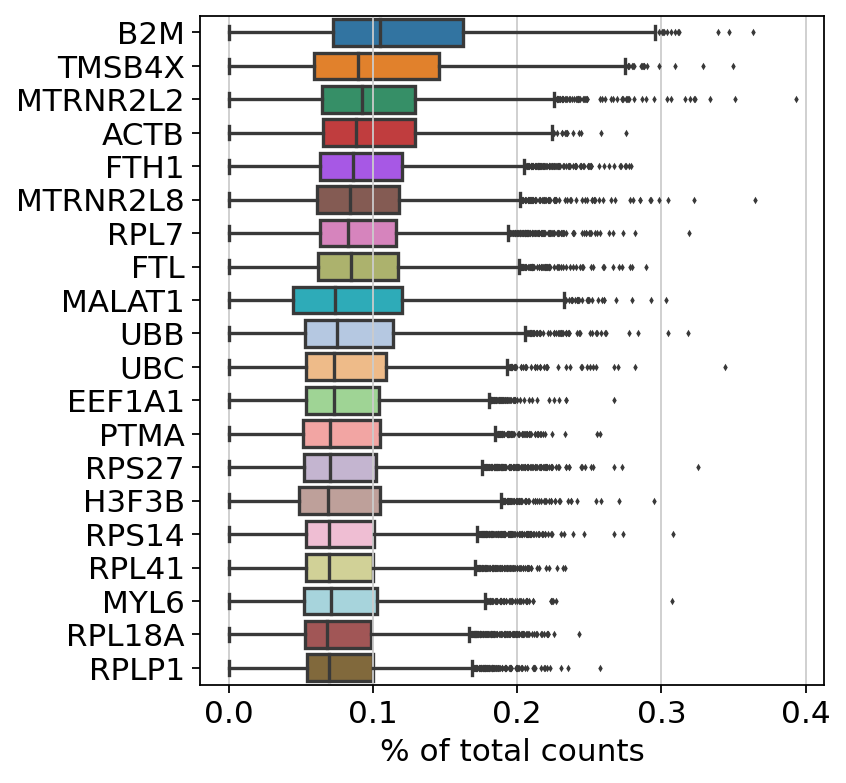

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [ ]:
# Prefiltering
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=2)

filtered out 1831 genes that are detected in less than 2 cells


In [ ]:
mito_genes = adata.var_names.str.startswith('mt-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
adata.var['hb'] = adata.var_names.str.contains(("^Hb.*-"))

sc.pp.calculate_qc_metrics(adata, 
                           qc_vars=['mt','hb'], 
                           percent_top=None, 
                           log1p=False, 
                           inplace=True
                           )

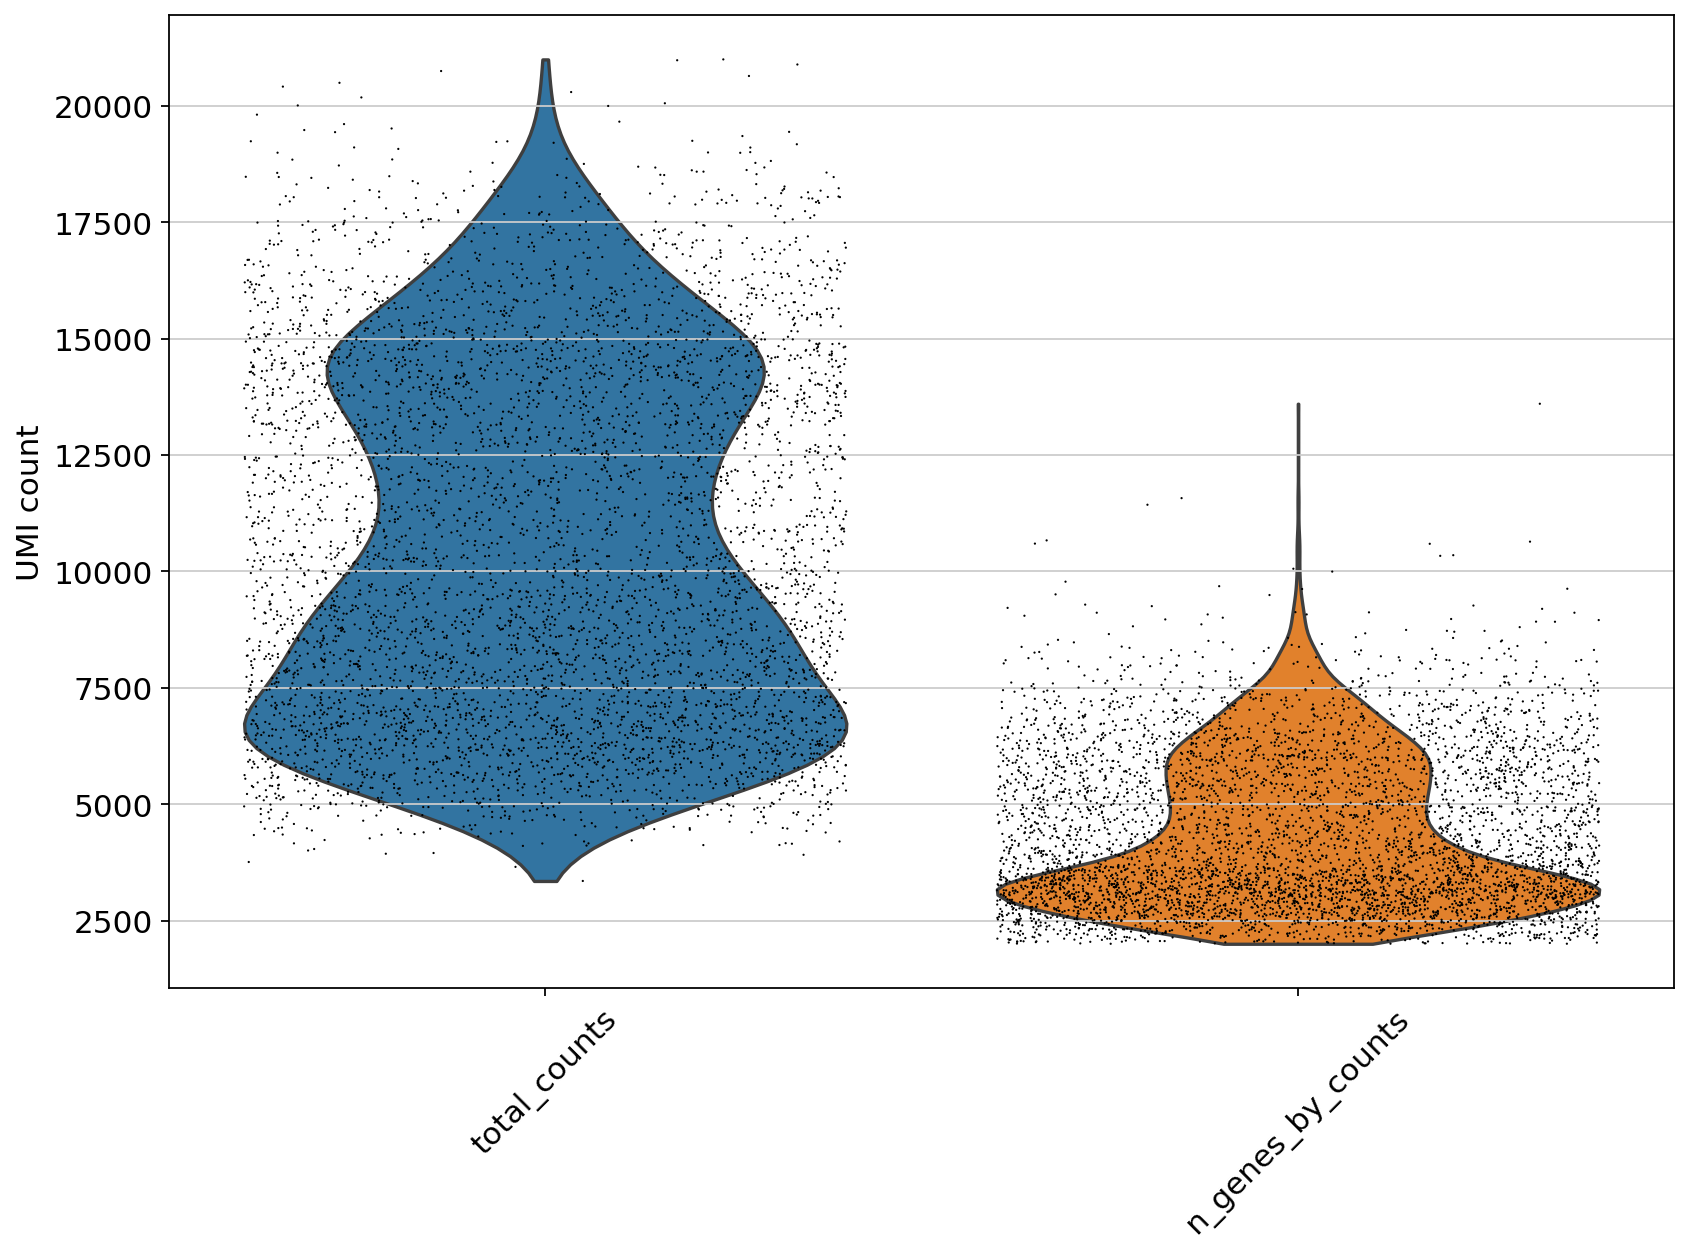

In [ ]:
sc.pl.violin(adata=adata, 
             keys=['total_counts', 'n_genes_by_counts'],
             jitter=0.4,rotation= 45, ylabel="UMI count", xlabel="",
             )

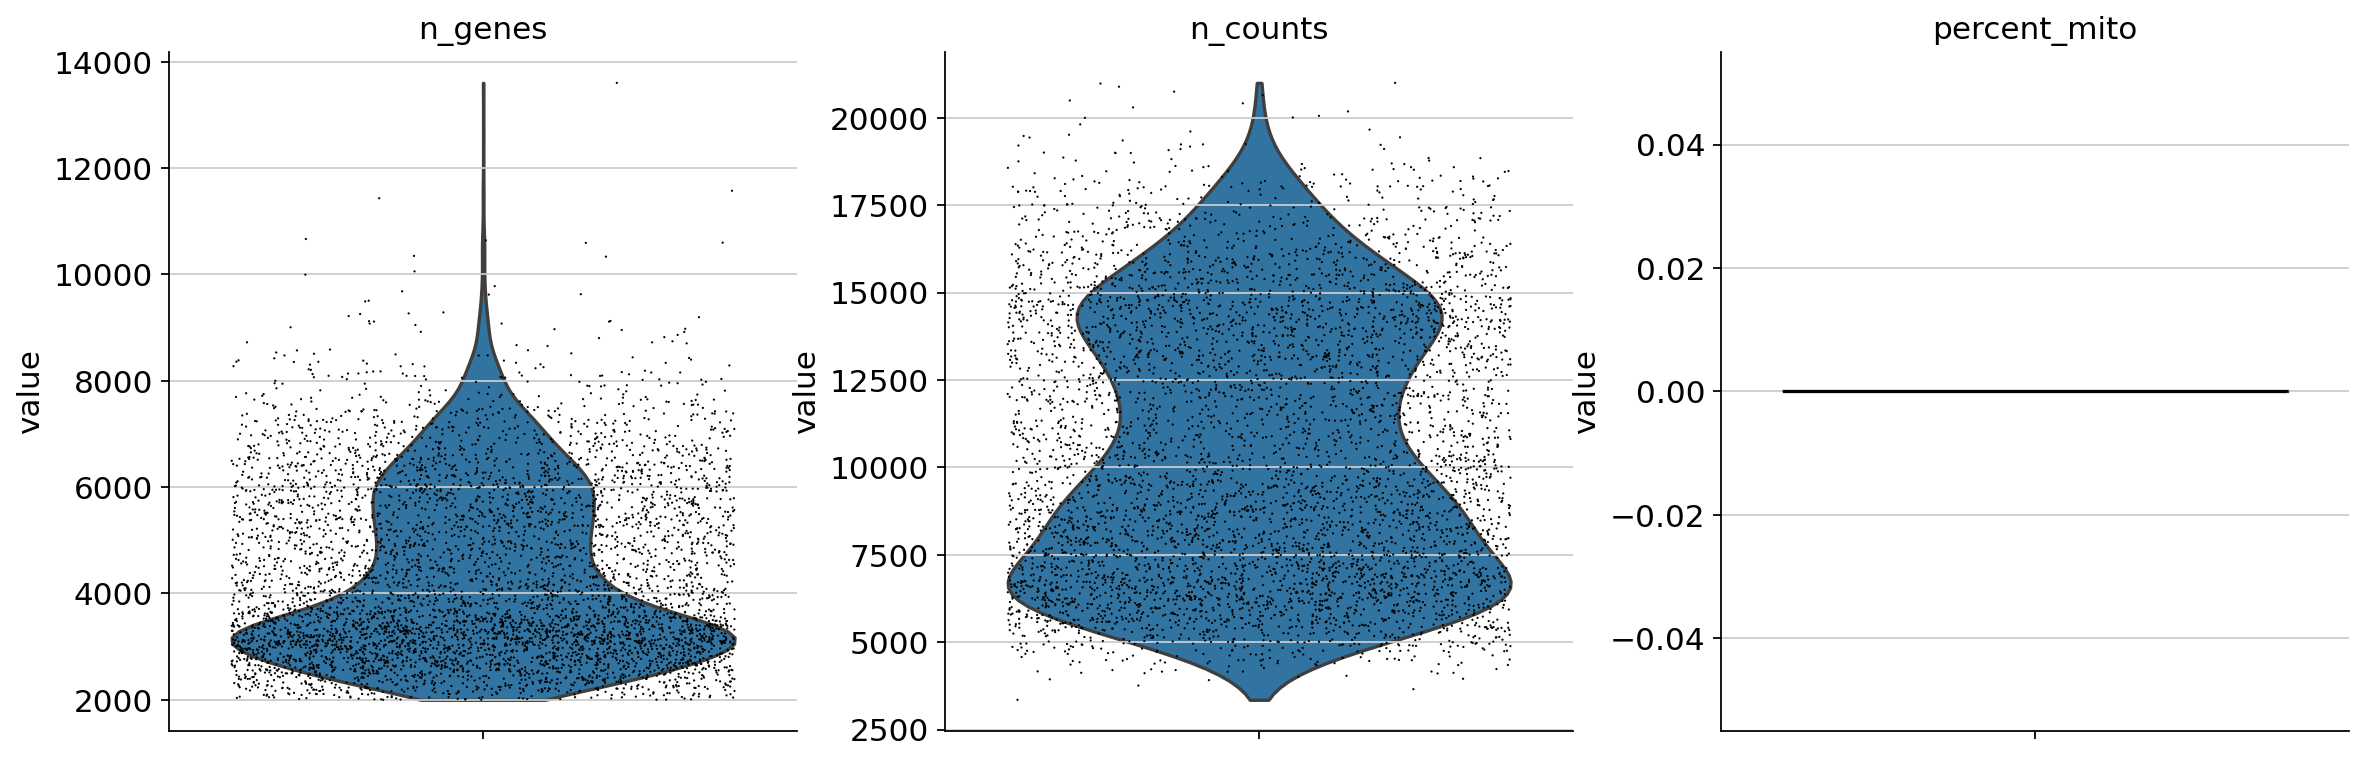

In [ ]:
sc.pl.violin(adata, 
             ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4,
             ylabel="UMI count", 
             xlabel="", 
             multi_panel=True
             )

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


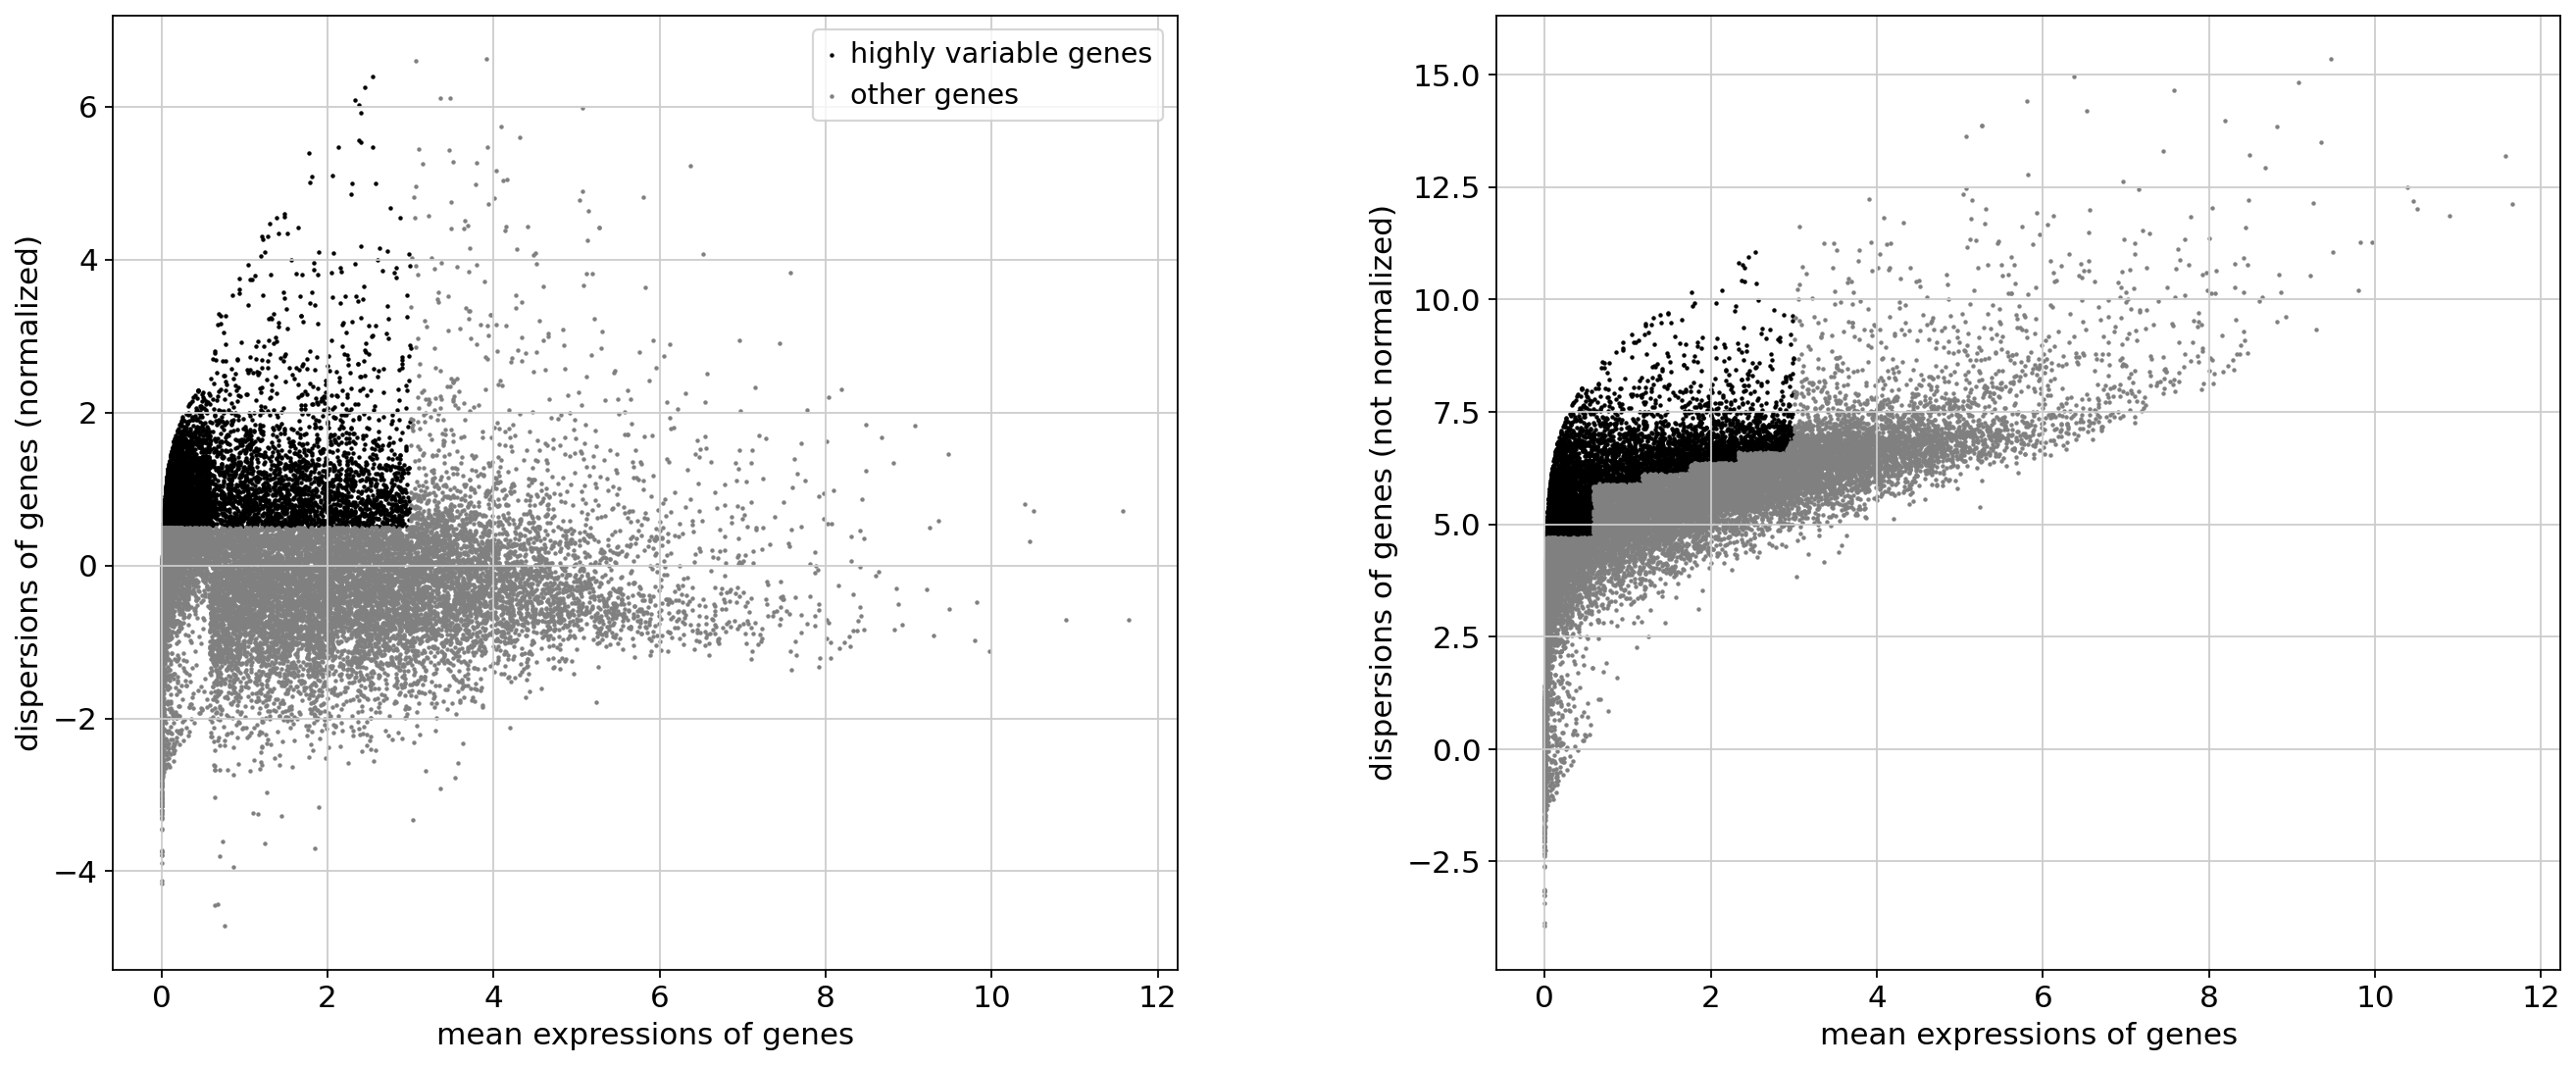

In [ ]:
sc.pp.highly_variable_genes(adata, flavor="seurat")
sc.pl.highly_variable_genes(adata)

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


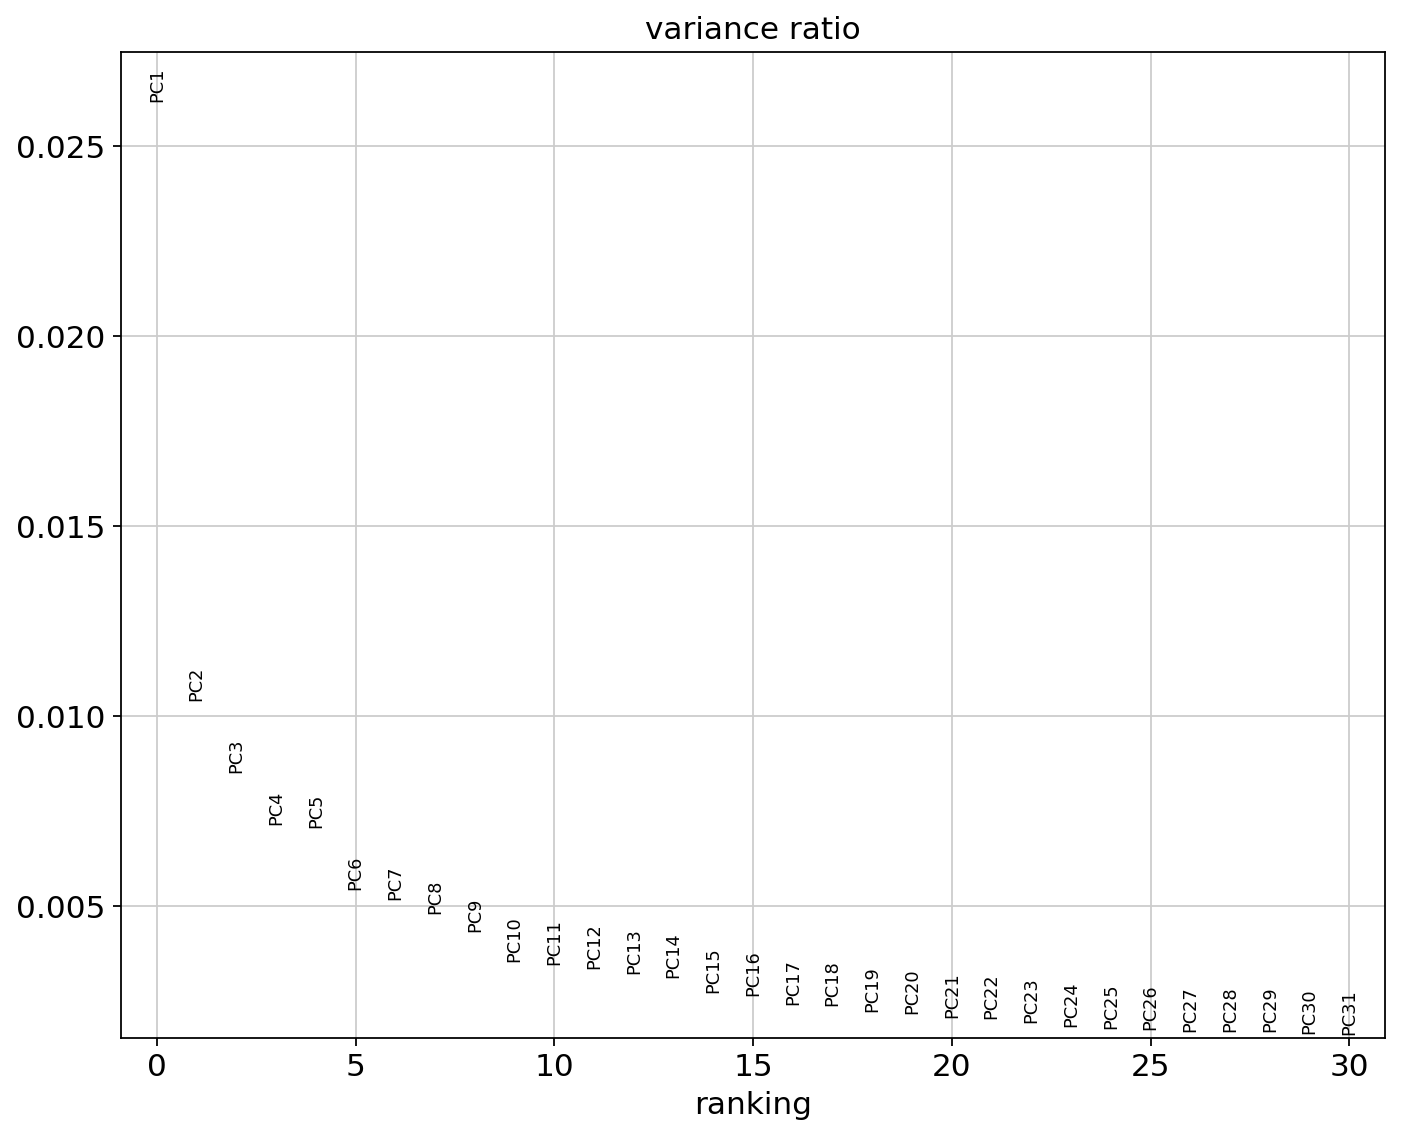

In [ ]:
sc.pl.pca_variance_ratio(adata, log=False)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)


In [ ]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


In [ ]:
cell_type_colors = {'B cell'    : '#E41A1C',
                    'CAF'       : '#377EB8',
                    'OSCC cell' : '#4DAF4A',
                    'DC'        : '#984EA3',
                    'EC'        : '#F29403',
                    'MAF'       : '#F781BF',
                    'MSC'       : '#BC9DCC',
                    'Mac'       : '#A65628',
                    'Mst'       : '#54B0E4',
                    'Myo'       : '#222F75',
                    'T cell'    : '#1B9E77'
                    }

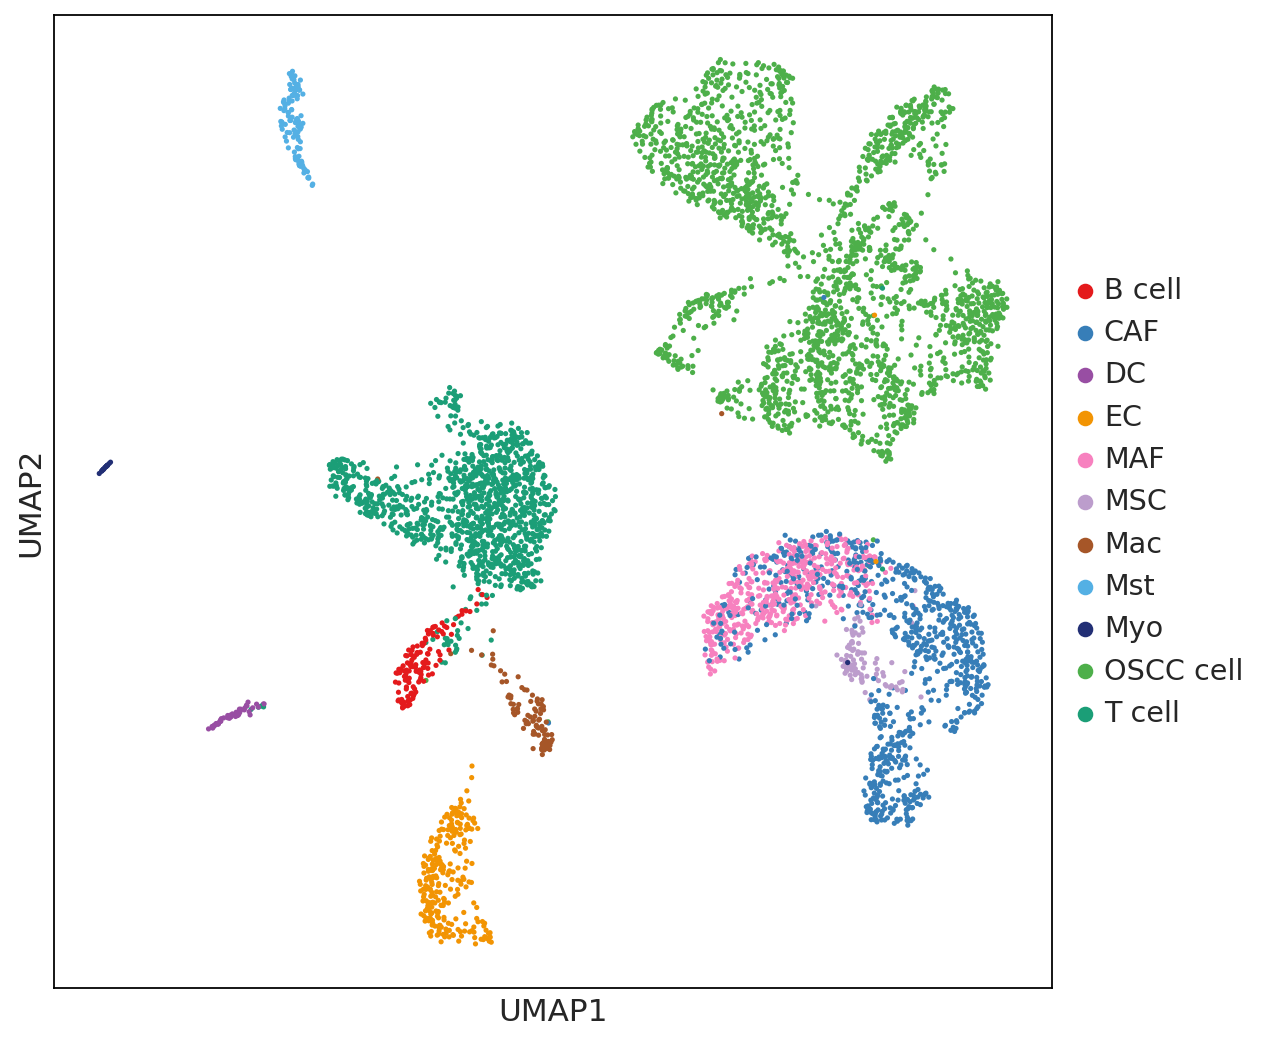

In [ ]:
sc.pl.umap(adata, 
           color="cell_types", 
           palette=cell_type_colors,
           )

In [ ]:
sample_colors ={
  'oscc5': (0.5490196078431373, 0.6352941176470588, 0.3215686274509804, 1.0),
  'oscc6': (0.7098039215686275, 0.8117647058823529, 0.4196078431372549, 1.0),
  'oscc7': (0.807843137254902, 0.8588235294117647, 0.611764705882353, 1.0),
  'oscc8': (0.2235294117647059, 0.23137254901960785, 0.4745098039215686, 1.0),
  'oscc10': (0.5490196078431373, 0.42745098039215684, 0.19215686274509805, 1.0),
  'oscc12': (0.3215686274509804, 0.32941176470588235, 0.6392156862745098, 1.0),
  'oscc13': (0.7411764705882353, 0.6196078431372549, 0.2235294117647059, 1.0),
  'oscc16': (0.4196078431372549, 0.43137254901960786, 0.8117647058823529, 1.0),
  'oscc17': (0.611764705882353, 0.6196078431372549, 0.8705882352941177, 1.0),
  'oscc18': (0.9058823529411765, 0.7294117647058823, 0.3215686274509804, 1.0),
  'oscc20': (0.9058823529411765, 0.796078431372549, 0.5803921568627451, 1.0),
  'oscc22': (0.38823529411764707, 0.4745098039215686, 0.2235294117647059, 1.0),
  'oscc23': (0.5176470588235295, 0.23529411764705882, 0.2235294117647059, 1.0),
  'oscc24': (0.6784313725490196, 0.28627450980392155, 0.2901960784313726, 1.0),
  'oscc25': (0.8392156862745098, 0.3803921568627451, 0.4196078431372549, 1.0),
  'oscc26': (0.9058823529411765, 0.5882352941176471, 0.611764705882353, 1.0),
  'oscc28': (0.4823529411764706, 0.2549019607843137, 0.45098039215686275, 1.0),
  }

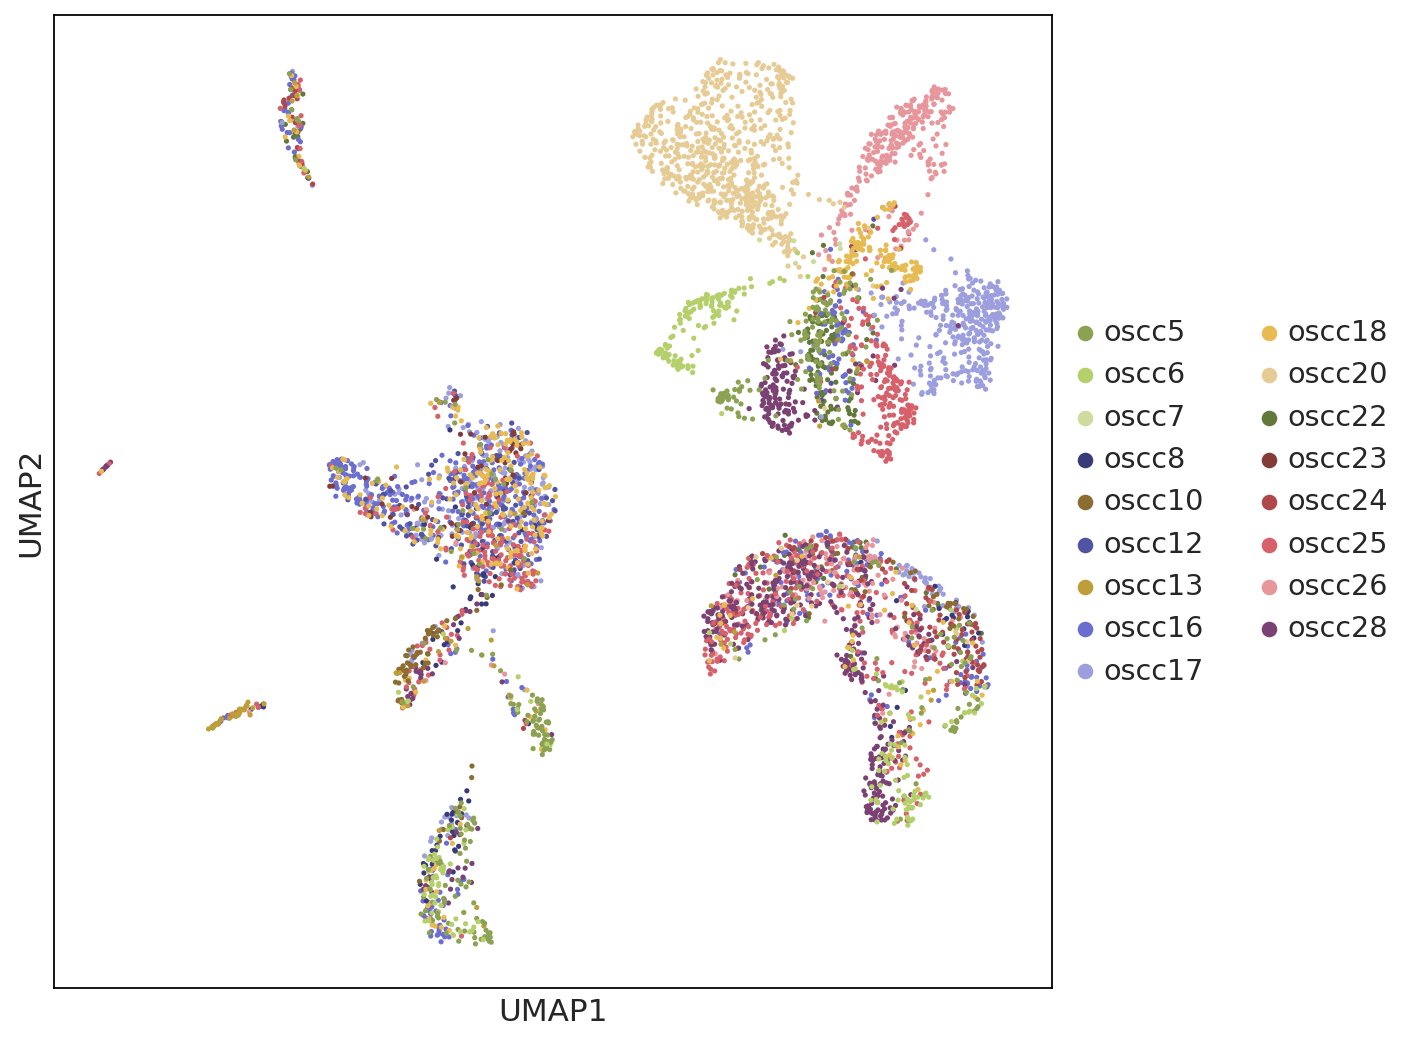

In [ ]:
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.pl.umap(adata, 
           color="Sample_ID", 
           palette=sample_colors,
           )

In [ ]:
condition_colors = {"N0_pri":"#377EB8B3", 
                    "LNM_met":"#99cc00", 
                    "LNM_pri":"#E41A1CB3"}

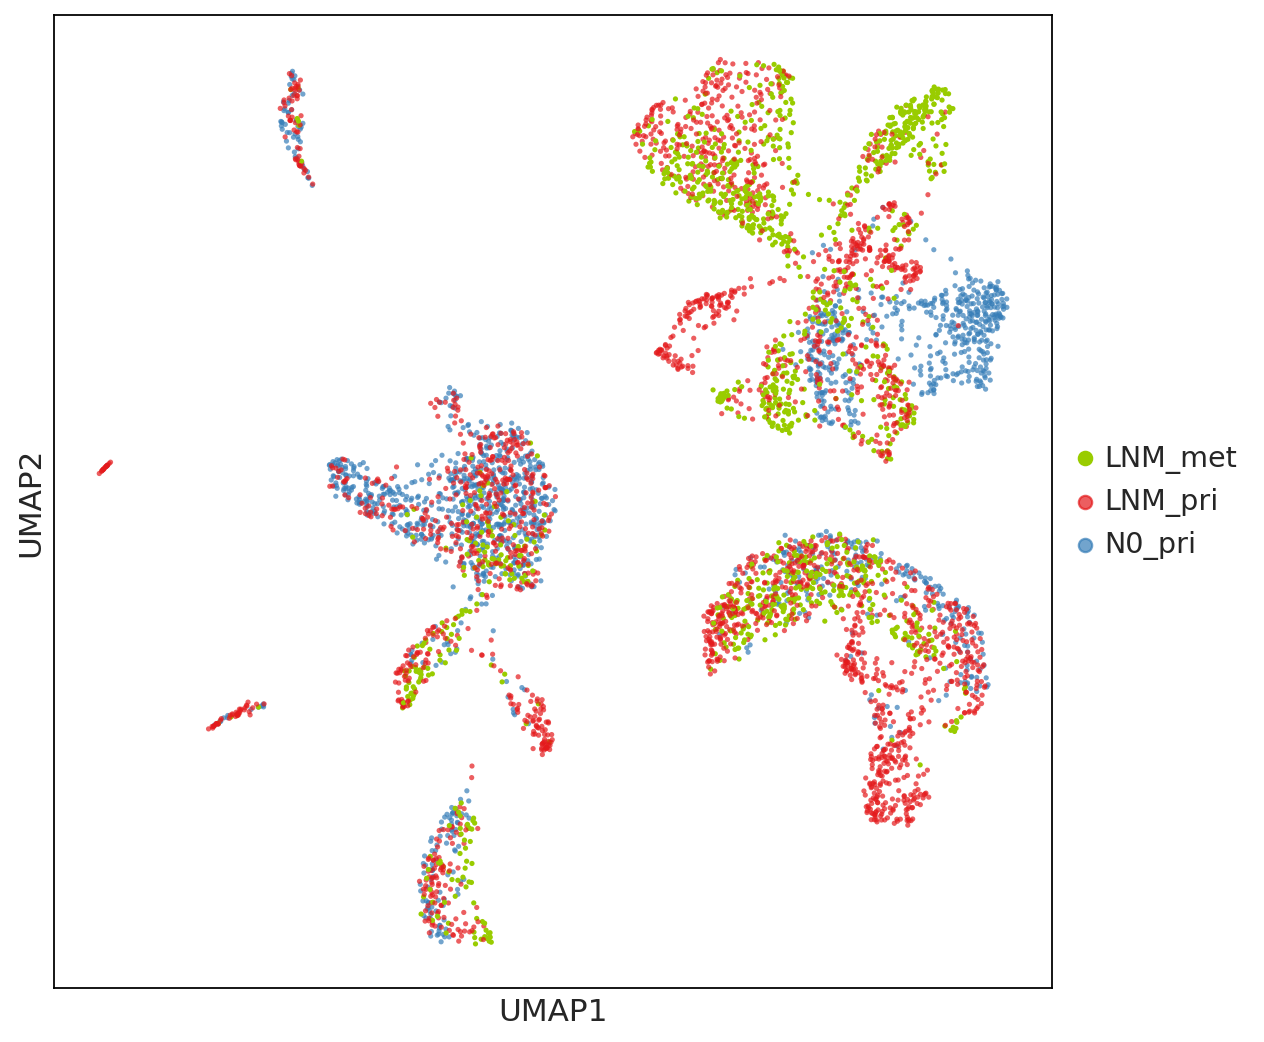

In [ ]:
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.pl.umap(adata, 
           color="condition", 
           palette=condition_colors,
           )

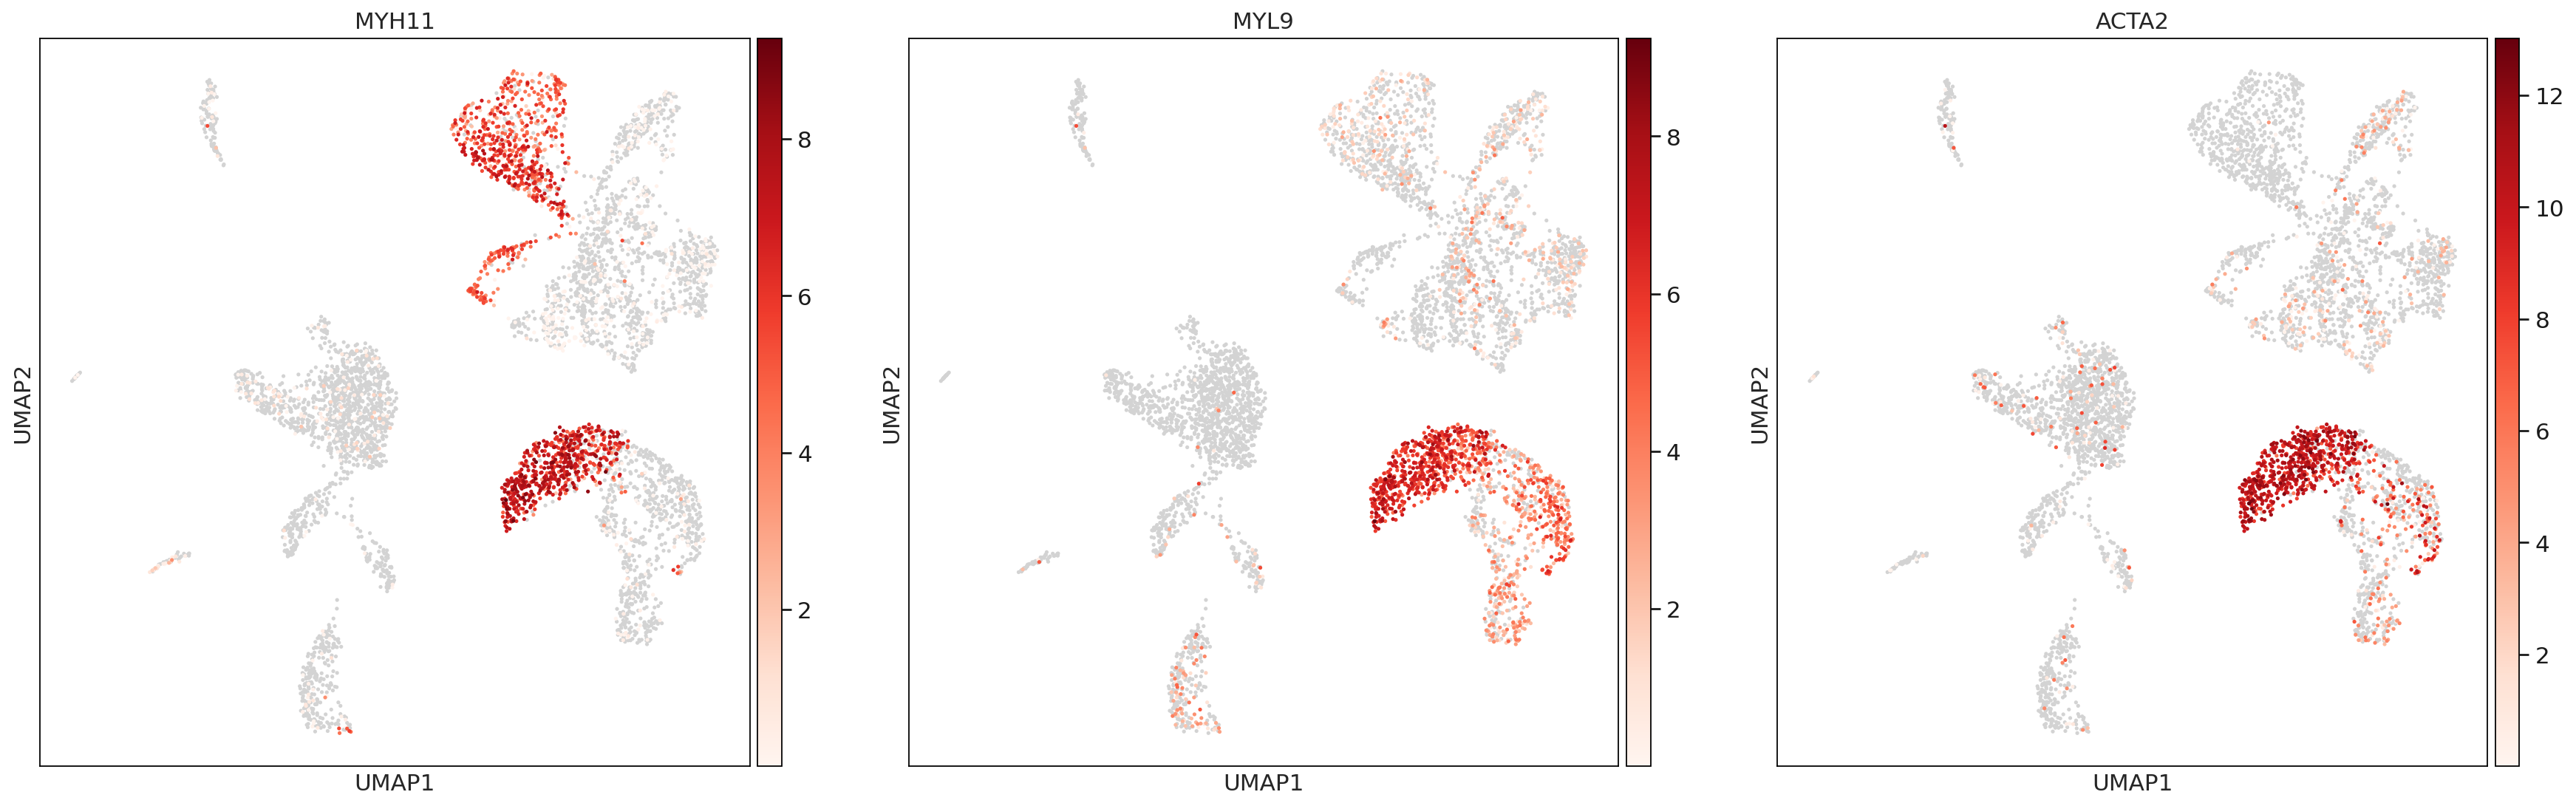

In [ ]:
reds = copy(plt.cm.Reds)
reds.set_under("lightgray")

sc.pl.umap(adata,
           color=['MYH11', 'MYL9', 'ACTA2'], 
           cmap=reds, 
           vmin=0.00001, 
           )


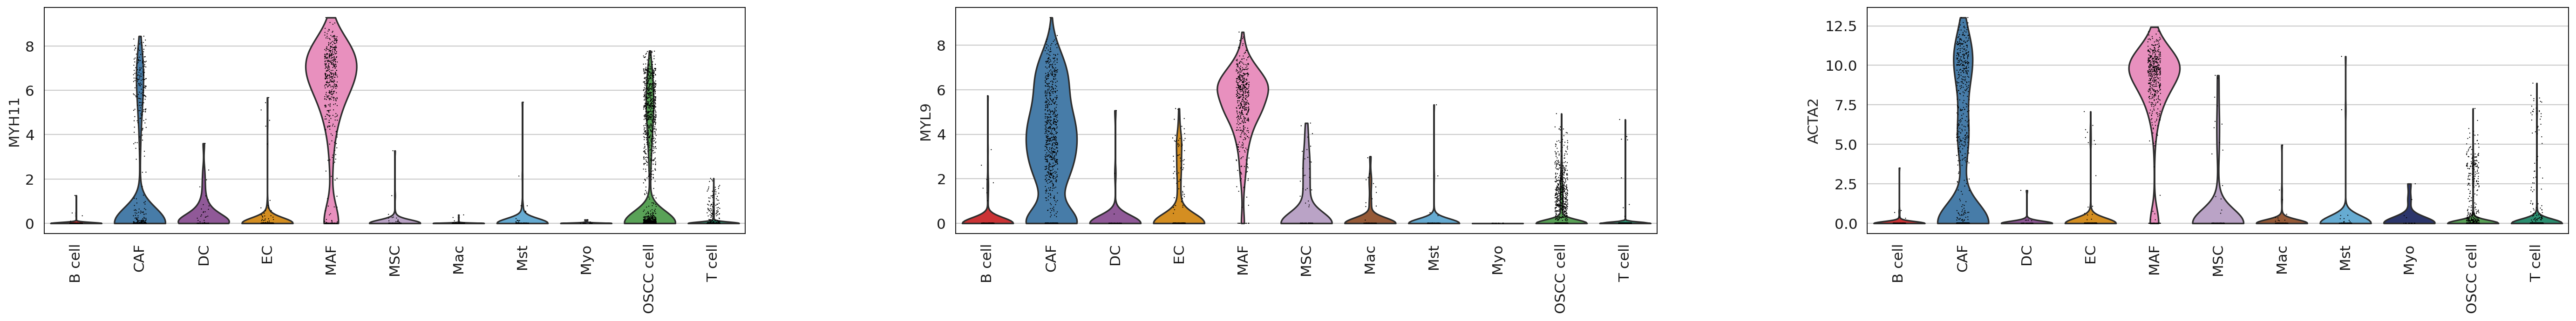

In [ ]:
sc.pl.violin(adata, 
             ['MYH11', 'MYL9', 'ACTA2'], 
             groupby='cell_types', 
             rotation=90, 
             )

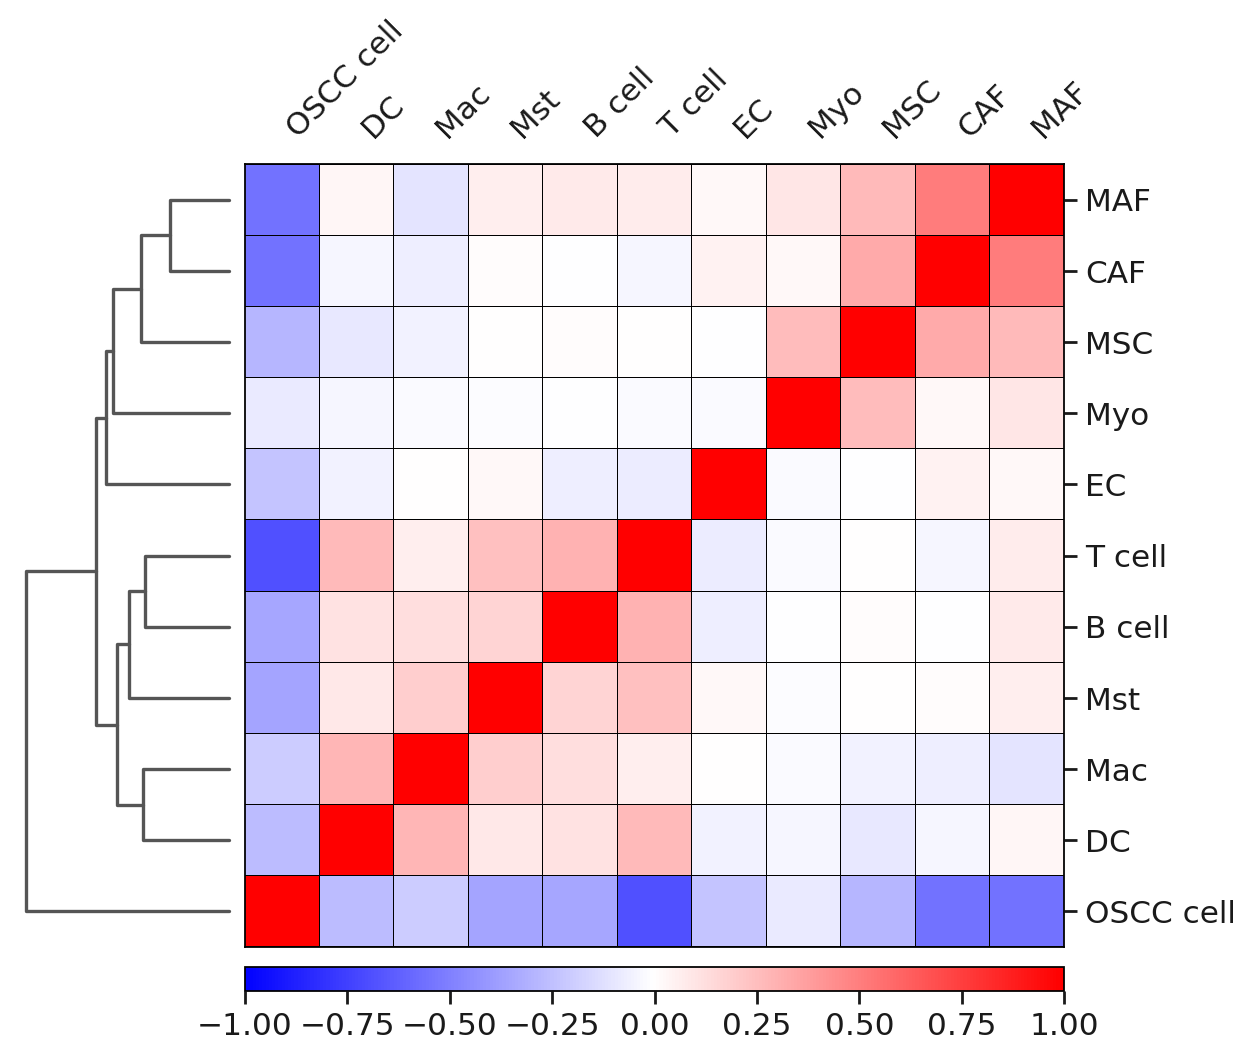

In [ ]:
sc.pl.correlation_matrix(adata, 
                         groupby='cell_types'
                         )

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:14)


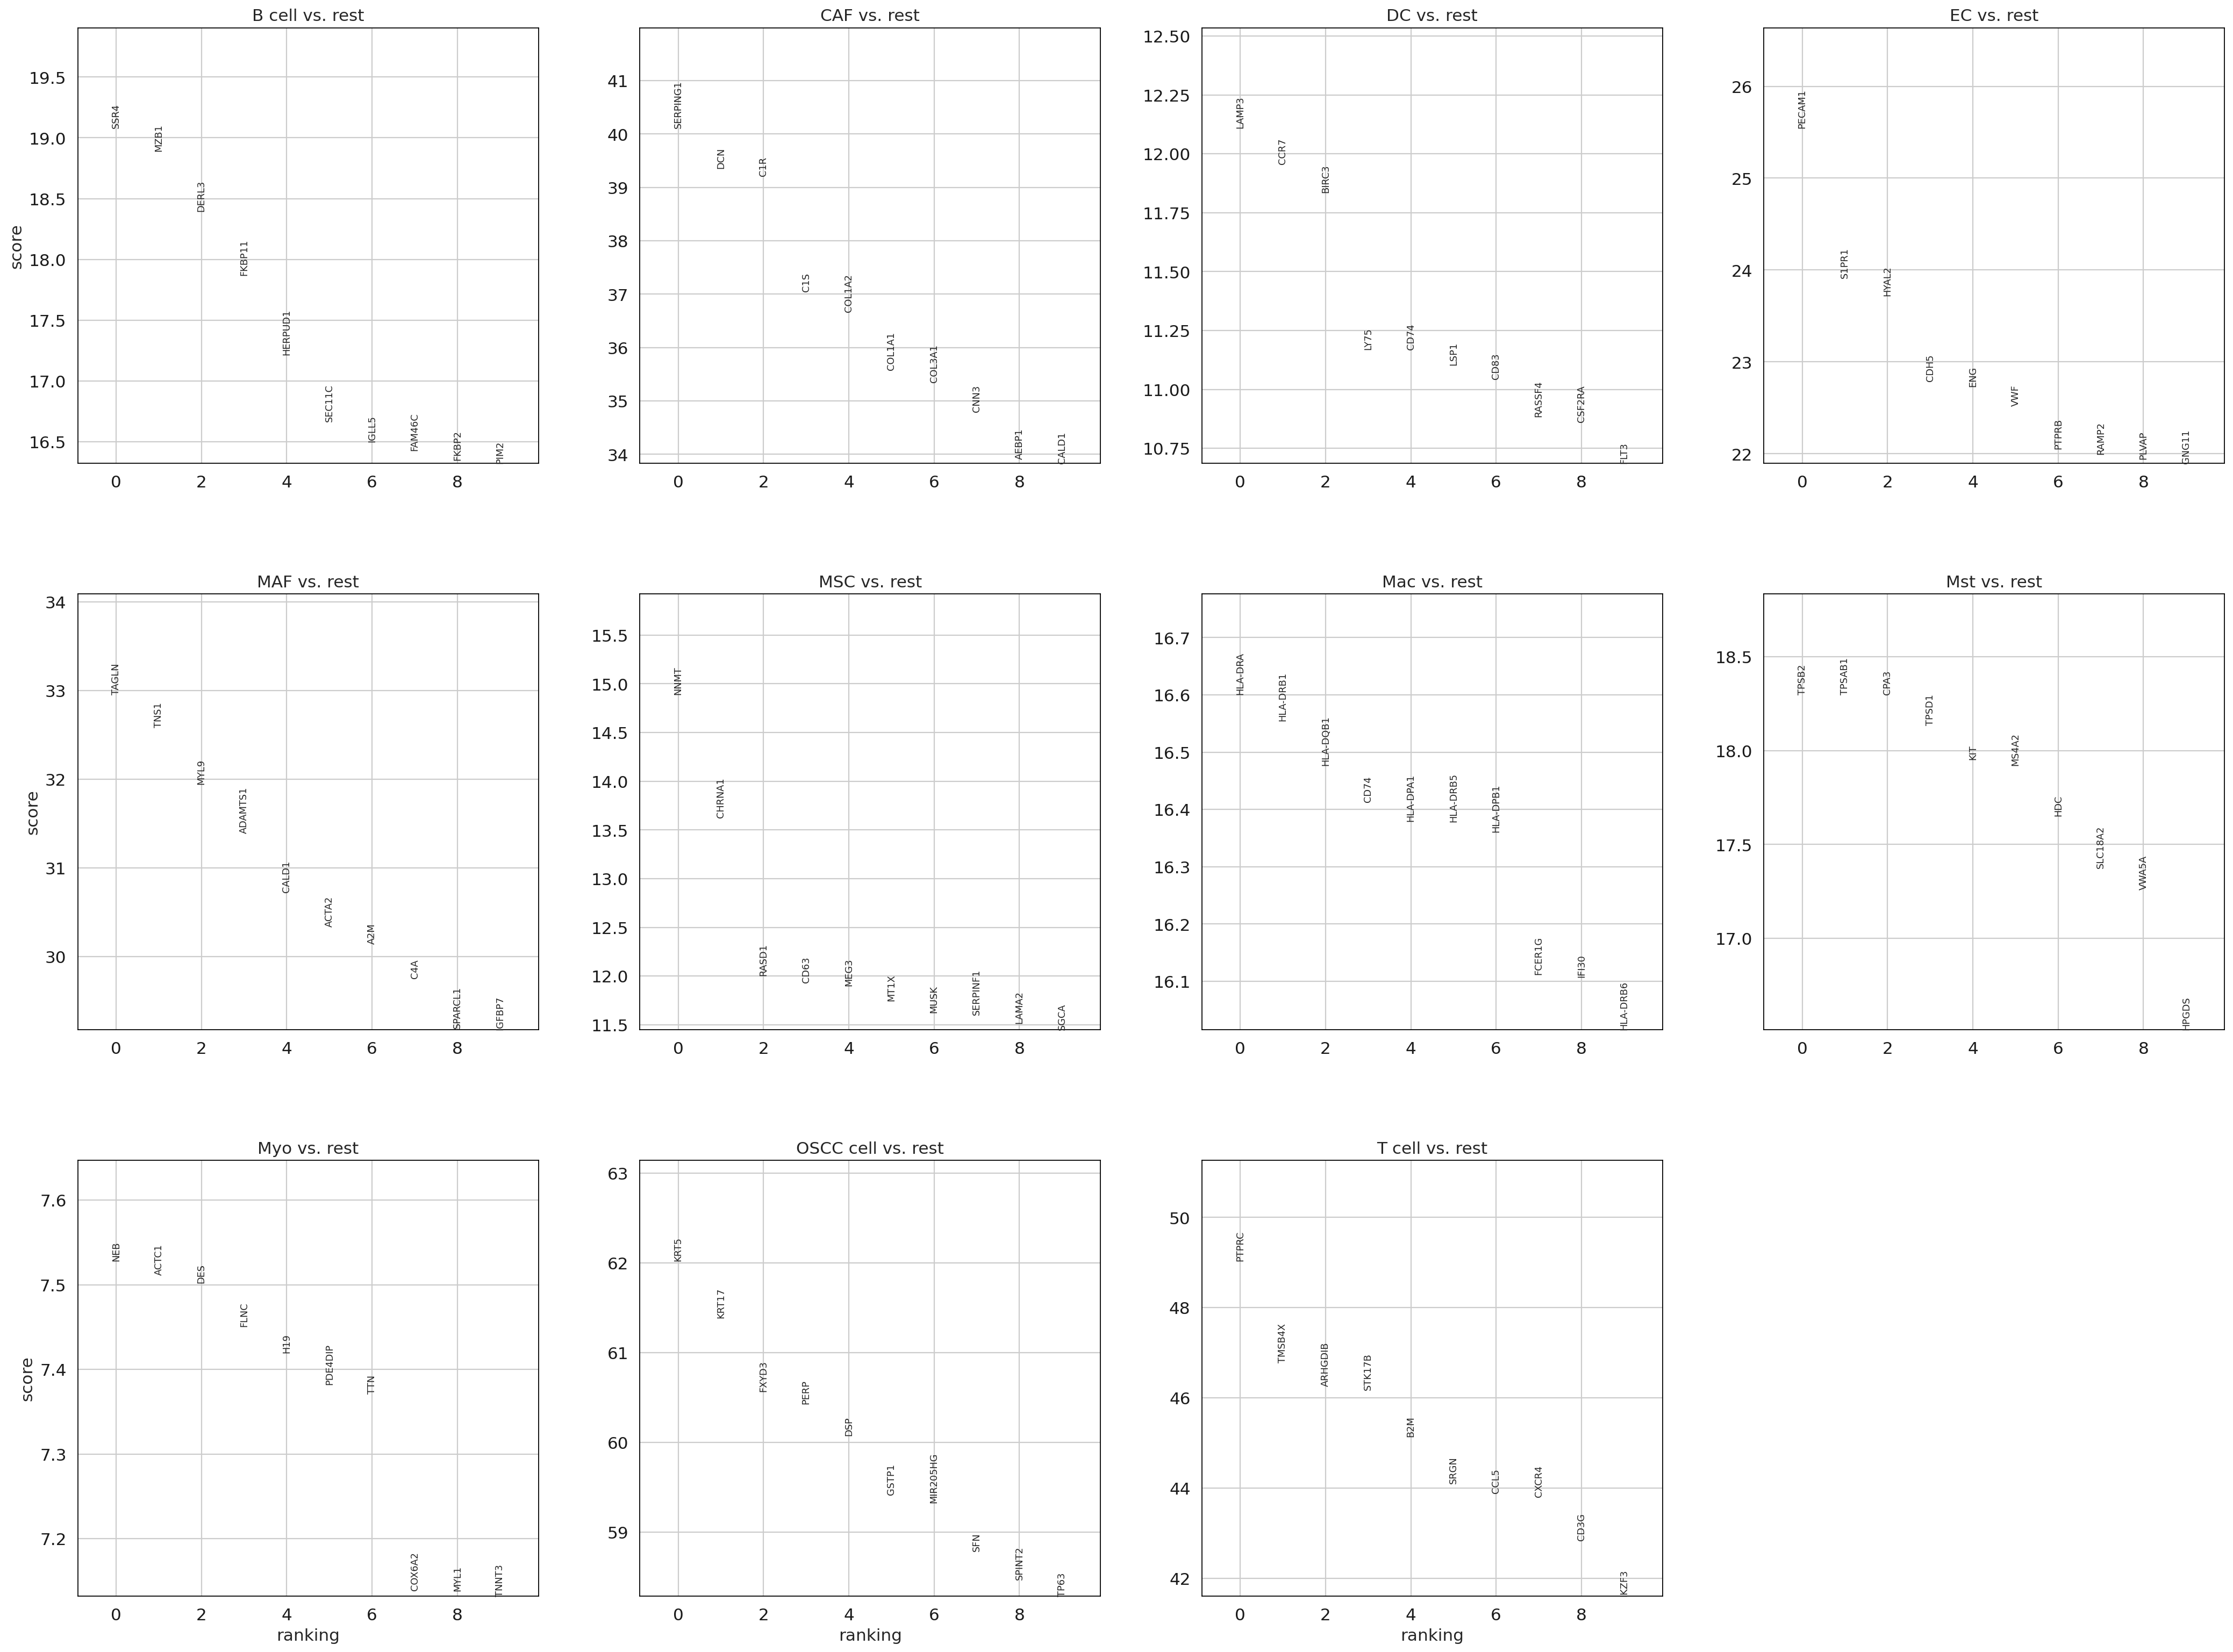

In [ ]:
sc.tl.rank_genes_groups(adata, 'cell_types', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

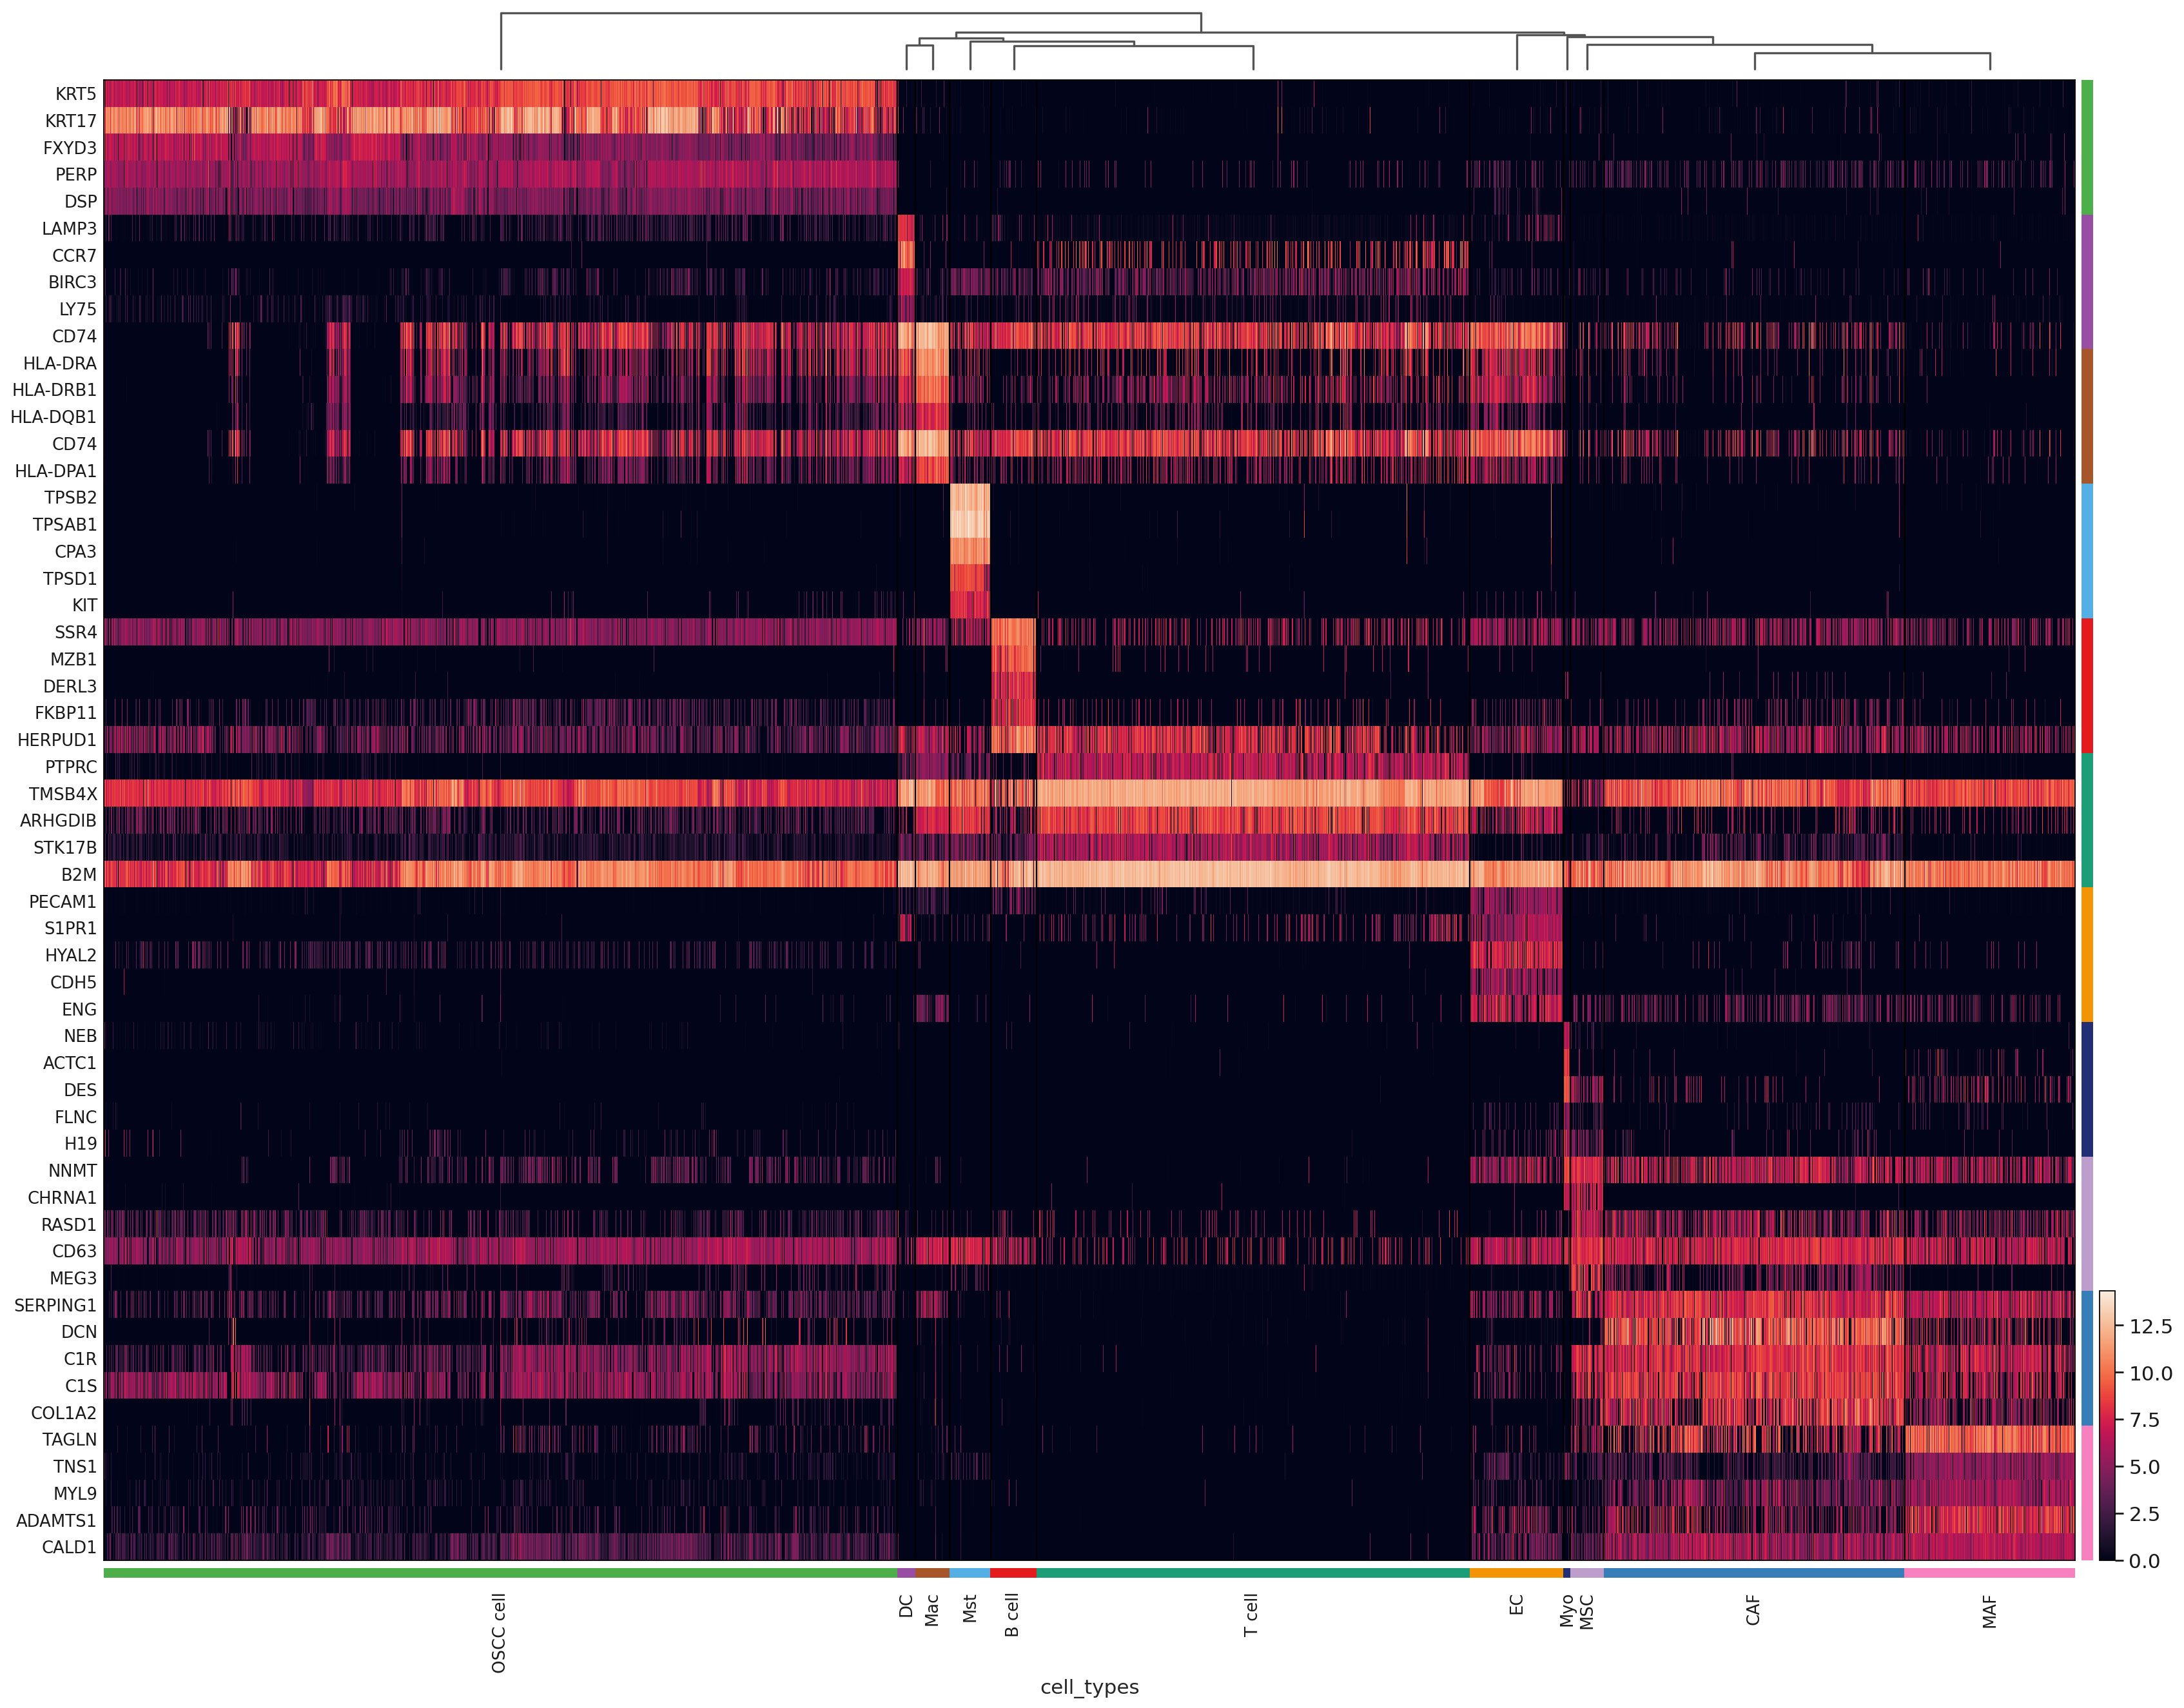

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata, 
                                n_genes=5, 
                                swap_axes=True, 
                                figsize=(25,20), 
                                show_gene_labels=True
                                )